In [1]:
from lazylib import make, GoogLeNet, device, takeConfusionMatrix, takeRocCurve, now, register
import torch

/home/luizp/projects/pibit/pibit/lib64/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
n = now()
epocs = 2
model, metrics = make(
    EPOCHS=epocs, 
    BATCH_SIZE=128, 
    LEARNING_RATE=1e-3, 
    csv_path="/home/luizp/projects/pibit/src/data/processed/csv/botClean.csv", 
    MODEL=GoogLeNet().to(device()), 
    SEED=1701,
    xcol=2
    ) 
register(metrics, f"/home/luizp/projects/pibit/src/0utput/text/{n}.txt")
torch.save(model.state_dict(), f"/home/luizp/projects/pibit/src/0utput/models/{n}_alexnet_{epocs}.nnModel")

[20-02-2024 18-56-25] Epoch 001 Acc: 0.9965 Loss: 8.78399413: 100%|██████████| 391/391 [00:57<00:00,  6.77it/s]
[20-02-2024 18-58-20] Epoch 001 Val. Acc: 0.9990 Val. Loss: 0.00639472: 100%|██████████| 3516/3516 [01:55<00:00, 30.49it/s]


[     0      0    432 449568]


[20-02-2024 18-59-25] Epoch 002 Acc: 0.9992 Loss: 0.00382366: 100%|██████████| 391/391 [01:03<00:00,  6.21it/s]
[20-02-2024 19-02-06] Epoch 002 Val. Acc: 0.9999 Val. Loss: 0.00040037: 100%|██████████| 3516/3516 [02:40<00:00, 21.87it/s]


[   394      0     38 449568]
Finished experiment!


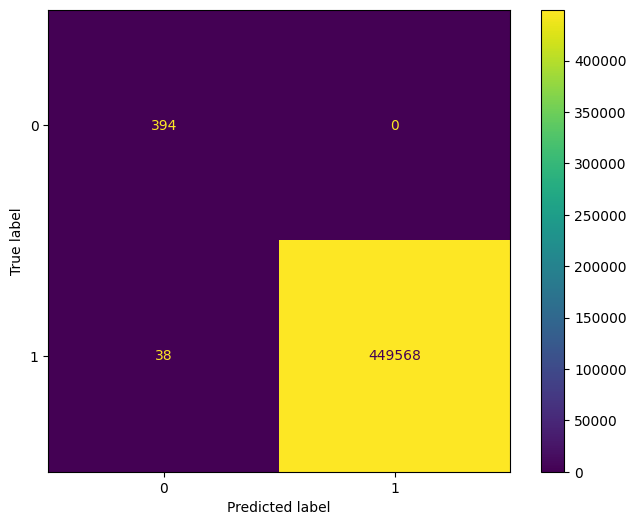

In [3]:
cm = takeConfusionMatrix(metrics, epocs-1, f"/home/luizp/projects/pibit/src/0utput/img/confusionMatix/{n}.png")

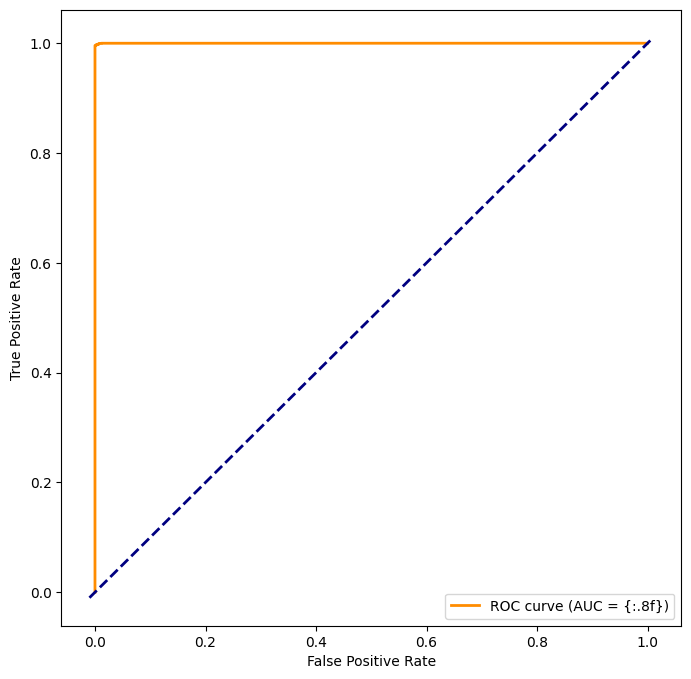

In [4]:
takeRocCurve(metrics, epocs-1, f"/home/luizp/projects/pibit/src/0utput/img/rocCurve/{n}.png")